# **Modelagem**


<img src="https://cdn.discordapp.com/attachments/748012097589215325/837146587481768016/unknown.png" 
     width="600" />

<img src="https://cdn.discordapp.com/attachments/748012097589215325/837147111388479528/unknown.png" 
     width="600" />

## **Instalação e importação**

In [1]:
%reset -f

In [2]:
#Instalar e importar bibliotecas:

try:
    import CoolProp
except ImportError:
    !pip install CoolProp


import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import CoolProp.CoolProp as cp
from CoolProp.CoolProp import PropsSI as ps
from CoolProp.CoolProp import State as st
from tabulate import tabulate as tab
import numpy as np
from sympy import *
import sympy as sp
import pandas as pd
import ipywidgets as wd
from IPython.display import display

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## **Escala de temperatura**

In [3]:
# Selecionar escala de temperatura:

Temperatura = input('Temperatura em °C ou em K? (Digite c ou k): ')

Temperatura em °C ou em K? (Digite c ou k): C


## **Declaração de variáveis**

In [4]:
# Declarar estados:

n = 12

fld = "Water"
cp.set_reference_state(fld,'DEF')
if Temperatura == 'k':
    Tnn = "Temperatura [K]"
else:
    Tnn = "Temperatura [°C]"

mnn = "Vazão mássica [kg/s]"
hnn = "Entalpia [kJ/kg]"
vnn = "Volume específico [m³/kg]"
Pnn = "Pressão [kPa]"
snn = "Entropia [kJ/kg*K]"
Xnn = "Título"

estado = np.arange(1, n+1, 1)

T = np.linspace(0,0,n)
m = np.linspace(0,0,n)
h = np.linspace(0,0,n)
v = np.linspace(0,0,n)
P = np.linspace(0,0,n)
s = np.linspace(0,0,n)
X = np.linspace(0,0,n)

## **Fornalha**

In [27]:
# Combustível:

P_CH4 = 0.8897
P_C2H6 = 0.0592
P_C3H8 = 0.0191
P_C4H10 = 0.0109
P_C02 = 0.0121
P_N2 = 0.0089
P_O2 = 0.0001
P_N2_Ar = 0.79
P_O2_Ar = 0.21

# Excesso de ar:

e = 1.5

In [28]:
#Cálculos:

CH4 = np.array([1,4,0,0])
C2H6 = np.array([2,6,0,0])
C3H8 = np.array([3,8,0,0])
C4H10 = np.array([4,10,0,0])
CO2 = np.array([1,0,2,0])
N2 = np.array([0,0,0,2])
O2 = np.array([0,0,2,0])
H2O = np.array([0,2,1,0])

MM = np.array([12.011,1.008,15.999,14.007])
P_GN = [P_CH4,P_C2H6,P_C3H8,P_C4H10,P_C02,P_N2,P_O2]

M_CH4 = np.sum(CH4*MM)
M_C2H6 = np.sum(C2H6*MM)
M_C3H8 = np.sum(C3H8*MM)
M_C4H10 = np.sum(C4H10*MM)
M_CO2 = np.sum(CO2*MM)
M_N2 = np.sum(N2*MM)
M_O2 = np.sum(O2*MM)
M_H2O = np.sum(H2O*MM)
M_Air = M_N2*P_N2_Ar+M_O2*P_O2_Ar

M = [M_CH4,M_C2H6,M_C3H8,M_C4H10,M_CO2,M_N2,M_O2,M_N2,M_H2O]

F_M = []
for i in range(0,4):
    F_M.append(P_GN)

np.array(F_M)
quant_atomos_comb = np.array([CH4,C2H6,C3H8,C4H10,CO2,N2,O2])
m_comp_comb = np.sum(F_M*quant_atomos_comb.T,axis=1)
m_comp_comb[2] = m_comp_comb[2]*(-1)

P_GN.append(P_N2_Ar/P_O2_Ar) #acrecentar partes de O2
P_GN.append(P_O2_Ar/P_O2_Ar) #acrecentar partes de N2

b = m_comp_comb[0]
c = m_comp_comb[1]/2
a = e*(m_comp_comb[2] + 2*b + c)/(2*P_GN[8])
d = (m_comp_comb[3] + 2*a*P_GN[7])/2
f = (2*e*(2*b+c)/(2*P_GN[8])-c-2*b)/2

BLNC = [1,1,1,1,1,1,1,a,a]

resposta = np.zeros((9,4))
quant_atomos_molecula = np.array([CH4,C2H6,C3H8,C4H10,CO2,N2,O2,N2,O2])

for i in range(0,9):
    for j in range(0,4):
        resposta[i,j] = quant_atomos_molecula[i,j] * MM[j] * P_GN[i] * BLNC[i]

fuel = resposta[0:7,0:4]
air = resposta[7:9,0:4]
soma = np.sum(resposta)
M_fuel = np.sum(fuel) #Massa total de combustível
soma_air = np.sum(air) #Massa total de ar
total_elem = np.sum(fuel, axis=0,keepdims=True) #C_tot, H_tot, O_tot, N_tot

F_tot = total_elem/M_fuel

PCS = 33900*F_tot[0,0] + 141800*(F_tot[0,1] - (F_tot[0,2]/8))

w = PCS/2440 - 9*F_tot[0,1]
F_w = w/M_fuel

PCI = PCS - 2440*(9*F_tot[0,1] - F_w)

ȦḞ = a*(1+79/21)
AF = ȦḞ*(M_Air/M_fuel)

print('A razão ar-combustível é de %.2f kg/kg\n' %AF)

elem = ['C', 'H', 'O', 'N']

for i in range(0,4):
    print(f'A razão {elem[i]}-combustível é de {round(F_tot[0,i],2)} kg/kg\n')

if e == 1:
    print('Mistura estequiométrica (e = 1)\n')
else:
    print(f'Mistura com {int((e-1)*100)}% de excesso de ar (e = {e})\n')
    
print('O PCI é de %.2f kJ/kg' %PCI)

A razão ar-combustível é de 24.22 kg/kg

A razão C-combustível é de 0.74 kg/kg

A razão H-combustível é de 0.23 kg/kg

A razão O-combustível é de 0.02 kg/kg

A razão N-combustível é de 0.01 kg/kg

Mistura com 50% de excesso de ar (e = 1.5)

O PCI é de 54933.88 kJ/kg


## **Equação**

<p style="font-family: times; text-align: center; font-style:bold; font-size: 14.5pt">
    ({{P_GN[0]}})$CH_{4}$ + ({{P_GN[1]}})$C_{2}H_{6}$ + ({{P_GN[2]}})$C_{3}H_{8}$ + ({{P_GN[3]}})$C_{4}H_{10}$ + ({{P_GN[4]}})$CO_{2}$ + ({{P_GN[5]}})$N_{2}$ + ({{P_GN[6]}})$O_{2}$ + ({{round(a,4)}})$\cdot[$({{round(P_GN[7],4)}})$N_{2(Ar)}$ + ({{P_GN[8]}})$O_{2(Ar)}]$   $\longrightarrow$   ({{round(b,4)}})$CO_{2}$ + ({{round(c,4)}})$H_{2}O$ + ({{round(d,4)}})$N_{2}$ + ({{round(f,4)}})$O_{2}$ 
</p>

## **Estados**

In [7]:
# Estado 1 - Entrada da turbina:

m[0] = 27.9 #kg/s
P[0] = 6495 #kPa                          ---> 8000kPa (Teste); 6495kPa (Original)
T[0] = 485 + 273.15 #K                    --->   600°C (Teste);   485°C (Original)
st1 = st(fld, {'P':P[0],'T':T[0]})
h[0] = st1.h         #entalpia
s[0] = st1.s         #entropia
X[0] = st1.Q
v[0] = 1/st1.rho

In [8]:
# Estado 2 - Primeira extração da turbina:

P[1] = 900      #kPa
st_isen2 = st(fld,{'P':P[1],'S':s[0]})     #turbina/bomba isentrópica ideal
h_isen2 = st_isen2.h
η_turb = 0.85       #eficiência da turbina
h[1] = h[0] - (h[0] - h_isen2) * η_turb
st2 = st(fld,{'P':P[1],'H':h[1]})
s[1] = st2.s
T[1] = st2.T
X[1] = st2.Q
v[1] = 1/st2.rho

In [9]:
# Estado 3 - Segunda extração da turbina:

P[2] = 250     #kPa
st_isen3 = st(fld,{'P':P[2],'S':s[1]})
h_isen3 = st_isen3.h
h[2] = h[1] - (h[1] - h_isen3) * η_turb
st3 = st(fld,{'P':P[2],'H':h[2]})
s[2] = st3.s
v[2] = 1/st3.rho
T[2] = st3.T
X[2] = st3.Q

In [10]:
# Estado 4 - Saída final da turbina / entrada do condensador:

T[3] = 51 + 273.15 #K                     --->    30°C (Teste);    51°C (Original)
st4 = st(fld, {'T': T[3], 'Q': 1})
P[3] = st4.p
st_isen4 = st(fld,{'P':P[3],'S':s[2]})
h_isen4 = st_isen4.h
h[3] = h[2] - (h[2] - h_isen4) * η_turb
st4 = st(fld,{'P':P[3],'H':h[3]})
X[3] = st4.Q      #título
s[3] = st4.s
v[3] = 1/st4.rho

In [11]:
# Estado 5 - Saída do condensador / entrada da bomba:

X[4] = 0
P[4] = P[3]
st5 = st(fld, {'P': P[4], 'Q': 0})
h[4] = st5.h
s[4] = st5.s
T[4] = st5.T
v[4] = 1/st5.rho

In [12]:
# Estado 6 - Entrada do desaerador / saída da bomba:

P[5] = P[2]
st_isen6 = st(fld, {'P': P[5], 'S': s[4]})
h_isen6 = st_isen6.h
η_pump = 0.85       #eficiência das bombas
h[5] = (h_isen6 - h[4]) / η_pump + h[4]
st6 = st(fld, {'P':P[5], 'H': h[5]})
s[5] = st6.s
T[5] = st6.T
X[5] = st6.Q
v[5] = 1/st6.rho

In [13]:
# Estado 7 - Saída do desaerador:

P[6] = P[2]
T[6] = 110 + 273.15
st7 = st(fld, {'P': P[6], 'T': T[6]})
h[6] = st7.h
s[6] = st7.s
X[6] = st7.Q
v[6] = 1/st7.rho

In [14]:
# Estado 8 - Entrada da caldeira:

P[7] = P[0]
st_isen8 = st(fld, {'P': P[7], 'S': s[6]})
h_isen8 = st_isen8.h
h[7] = (h_isen8 - h[6]) / η_pump + h[6]
st8 = st(fld, {'P': P[7], 'H': h[7]})
T[7] = st8.T
s[7] = st8.s
X[7] = st8.Q
v[7] = 1/st8.rho

In [15]:
# Estado 9 - Entrada da bomba:

st9 = st7
h[8] = st9.h
s[8] = st9.s
P[8] = st9.p
T[8] = st9.T
X[8] = st9.Q
v[8] = 1/st9.rho

In [16]:
# Estado 10 - Saída da bomba / entrada do trocador de calor:

P[9] = P[1]
st_isen10 = st(fld, {'P': P[9], 'S': s[8]})
h_isen10 = st_isen10.h
h[9] = (h_isen10 - h[8]) / η_pump + h[8]
st10 = st(fld, {'P': P[9], 'H': h[9]})
s[9] = st10.s
T[9] = st10.T
X[9] = st10.Q
v[9] = 1/st10.rho

In [17]:
# Estado 11 - Entrada do processo industrial vizinho:

X[10] = 1
P[10] = P[9]
st11 = st(fld, {'P': P[10], 'Q': X[10]})
h[10] = st11.h
s[10] = st11.s
T[10] = st11.T
v[10] = 1/st11.rho

In [18]:
# Estado 12 - Saída do processo industrial vizinho:

X[11] = 0
P[11] = P[9]
st12 = st(fld, {'P':P[11], 'Q': X[11]})
h[11] = st12.h
s[11] = st12.s
T[11] = st12.T
v[11] = 1/st12.rho

## **Tabela - Estados**

In [19]:
# Tabela 1:
headers=["Estado", Tnn, Pnn, Xnn, hnn, snn, vnn]

for i in range(0, n):
    if Temperatura == 'k':
        T[i] = round(float(T[i]),2)
    else:
        T[i] = round(float(T[i]-273.15),2)
        P[i] = round(float(P[i]),2)
        X[i] = round(float(X[i]),2)
        h[i] = round(float(h[i]),2)
        s[i] = round(float(s[i]),4)
        v[i] = round(float(v[i]),6)
        
X_arrumado = []

for i in range(0, n):
    if X[i] == -1:
        X_arrumado.append('-')
    else:
        X_arrumado.append(X[i])

df1 = pd.DataFrame()
tabela_estados = {Tnn: T, Pnn: P, Xnn: X_arrumado, hnn: h, snn: s, vnn: v}
df1 = pd.DataFrame(tabela_estados, index=["Estado 1", "Estado 2", "Estado 3", "Estado 4", "Estado 5", "Estado 6", "Estado 7", "Estado 8", "Estado 9", "Estado 10", "Estado 11", "Estado 12"])

#Voltar temperatura à condição inicial:

for i in range(0, n):
    if Temperatura == 'k':
        T[i] = round(float(T[i]),2)
    else:
        T[i] = round(float(T[i]+273.15),2)

st_antes = [st1, st2, st3, st4, st5, st6, st7, st8, st9, st10, st11, st12]

{{df1}}

## **Cálculos**

In [20]:
# Cálculos:
m1 = m[0]
h1 = h[0]
h2 = h[1]
h3 = h[2]
h4 = h[3]
h5 = h[4]
h6 = h[5]
h7 = h[6]
h8 = h[7]
h9 = h[8]
h10 = h[9]
h11 = h[10]
h12 = h[11]
 
# Quantidade de iterações:
quant = 10
 
variacao = np.zeros(quant + 1, dtype = float)
resultados = np.zeros((n+1)*(quant + 1), dtype = float).reshape((n+1, quant + 1))
 
T_hout_cond = []
η_sys = []
W_liq =[]

STT_T = []
STT_P = []
STT_X = []
STT_h = []
STT_s = []
STT_v = []
Ti = np.linspace(0,0,n)
Xi = list(range(0,n))

# Vazões mássicas:
for i in range(quant + 1):
    processo = i/10
    
    m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12 = var('m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12')
    EqMassa = [m8-m1, m4-m5, m5-m6, m9-m10, m11-m12, m2+m10-m11, m2+m3+m4-m1, m12+m3+m6-m7, m2*h2+m10*h10-m11*h11, m12*h12+m3*h3+m6*h6-m7*h7, m12-6.94*processo]
    massa = linsolve(EqMassa, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12)
    (m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12) =  next(iter(massa))

    massa = np.array(list(massa))
 
    for j in range(quant + 1):
        massa[0,j] = round(float(massa[0,j]),2)
 
    variacao[i] = i*10
    resultados[0, i] = variacao[i]
    resultados[1, i] = m[0]
    resultados[2:(n+1), i] = massa

    # Saídas de energia:
    W_p1 = -m5*(h5 - h6) #(Perde energia "-")
    W_p2 = -m8*(h7 - h8) #(Perde energia "-")
    W_p3 = -m9*(h9 - h10) #(Perde energia "-")
    W_pump = W_p1 + W_p2 + W_p3 #(Somatório dos trabalhos da bombas)

    # Eficiência da caldeira:
    η_cald = 0.85
    #PCI = 10000 # kJ/kg

    # Encontra o trabalho gerado pela turbina e a vazão de combustível para a demanda:
    W_t = m1*h1 - m2*h2 - m3*h3 - m4*h4
    m_fuel = m1*(h1-h8)/(PCI*η_cald) #η_cald = m1*(h1-h8)/(m_fuel*PCI)

    # Entrada de energia:
    Q_in = m_fuel * PCI #(Ganha energia "+")

    η_sys.append(round((W_t - W_pump)/Q_in, 4))

    W_liq.append(round(η_sys[i]*Q_in,2))

    # Condensador:
    T_cout = 39.5 
    T_cin = 29
    T_hin = T[3] - 273.15

    ϵ = (T_cout - T_cin)/(T_hin - T_cin)
    NUT = -ln(1 - ϵ)

    CT_in = st(fld, {'P': 101.325, 'T': T_cin + 273.15})
    CT_out = st(fld, {'P': 101.325, 'T': T_cout + 273.15})

    C_min = 4500/3600*(CT_in.rho + CT_out.rho)/2*(CT_in.cp + CT_out.cp)/2

    UA = NUT * C_min # Coeficiente global de tranferência de calor * Área

    # Sistema não-linear:
    ΔT_0, ΔT_L, T_hout, ΔT_ml, Q_out = var('ΔT_0, ΔT_L, T_hout, ΔT_ml, Q_out')
    EqCond = [ΔT_0-(T_hout-T_cin), ΔT_L-(T_hout-T_cout), ΔT_ml-(ΔT_0-ΔT_L)/ln(ΔT_0/ΔT_L), Q_out-UA*ΔT_ml, Q_out-m4*(h4-h5)]
    EqCond_solve = nonlinsolve(EqCond, ΔT_0, ΔT_L, T_hout, ΔT_ml, Q_out) 
    (ΔT_0, ΔT_L, T_hout, ΔT_ml, Q_out) = next(iter(EqCond_solve))

    # Redefinindo estados:
    T[3] = T_hout + 273.15 #K
    #P[3] = psi('P','T',T[3],'Q', 1, fld)/1000  #divide por 1000 pra sair em kPa
    st4 = st(fld, {'T': T[3], 'Q': 1})
    P[3] = st4.p
    st_isen4 = st(fld,{'P':P[3],'S':s[2]})
    h_isen4 = st_isen4.h
    h[3] = h[2] - (h[2] - h_isen4) * η_turb
    st4 = st(fld,{'P':P[3],'H':h[3]})
    X[3] = st4.Q      #título
    s[3]=st4.s
    v[3] = 1/st4.rho

    X[4] = 0
    P[4] = P[3]
    st5 = st(fld, {'P': P[4], 'Q': X[4]})
    h[4] = st5.h
    s[4] = st5.s
    T[4] = st5.T
    v[4] = 1/st5.rho

    P[5] = P[2]
    st_isen6 = st(fld, {'P': P[5], 'S': s[4]})
    h_isen6 = st_isen6.h
    η_pump = 0.85       #eficiência das bombas
    h[5] = (h_isen6 - h[4]) / η_pump + h[4]
    st6 = st(fld, {'P':P[5], 'H': h[5]})
    s[5] = st6.s
    T[5] = st6.T
    X[5] = st6.Q
    v[5] = 1/st6.rho

    P[6] = P[2]
    T[6] = 110 + 273.15
    st7 = st(fld, {'P': P[6], 'T': T[6]})
    h[6] = st7.h
    s[6] = st7.s
    X[6] = st7.Q
    v[6] = 1/st7.rho

    P[7] = P[0]
    st_isen8 = st(fld, {'P': P[7], 'S': s[6]})
    h_isen8 = st_isen8.h
    h[7] = (h_isen8 - h[6]) / η_pump + h[6]
    st8 = st(fld, {'P': P[7], 'H': h[7]})
    T[7] = st8.T
    s[7] = st8.s
    X[7] = st8.Q
    v[7] = 1/st8.rho

    st9 = st7
    h[8] = st9.h
    s[8] = st9.s
    P[8] = st9.p
    T[8] = st9.T
    X[8] = st9.Q
    v[8] = 1/st9.rho

    P[9] = P[1]
    st_isen10 = st(fld, {'P': P[9], 'S': s[8]})
    h_isen10 = st_isen10.h
    h[9] = (h_isen10 - h[8]) / η_pump + h[8]
    st10 = st(fld, {'P': P[9], 'H': h[9]})
    s[9] = st10.s
    T[9] = st10.T
    X[9] = st10.Q
    v[9] = 1/st10.rho

    X[10] = 1
    P[10] = P[9]
    st11 = st(fld, {'P': P[10], 'Q': X[10]})
    h[10] = st11.h
    s[10] = st11.s
    T[10] = st11.T
    v[10] = 1/st11.rho

    X[11] = 0
    P[11] = P[9]
    st12 = st(fld, {'P':P[11], 'Q': X[11]})
    h[11] = st12.h
    s[11] = st12.s
    T[11] = st12.T
    v[11] = 1/st12.rho
  
    for i in range(0,n):
        if Temperatura == 'k':
            Ti[i] = round(T[i],2)
        else:
            Ti[i] = round(T[i]-273.15,2)
            P[i] = round(P[i],2)
            X[i] = round(X[i],2)
            h[i] = round(h[i],2)
            s[i] = round(s[i],4)
            v[i] = round(v[i],6)
        if X[i] == -1:
            Xi[i] = '-'
        else:
            Xi[i] = X[i]

    STT_T.append([Tnn,processo*100,Ti[0],Ti[1],Ti[2],Ti[3],Ti[4],Ti[5],Ti[6],Ti[7],Ti[8],Ti[9],Ti[10],Ti[11]])
    STT_P.append([Pnn,processo*100,P[0],P[1],P[2],P[3],P[4],P[5],P[6],P[7],P[8],P[9],P[10],P[11]])
    STT_X.append([Xnn,processo*100,Xi[0],Xi[1],Xi[2],Xi[3],Xi[4],Xi[5],Xi[6],Xi[7],Xi[8],Xi[9],Xi[10],Xi[11]])
    STT_h.append([hnn,processo*100,h[0],h[1],h[2],h[3],h[4],h[5],h[6],h[7],h[8],h[9],h[10],h[11]])
    STT_s.append([snn,processo*100,s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11]])
    STT_v.append([vnn,processo*100,v[0],v[1],v[2],v[3],v[4],v[5],v[6],v[7],v[8],v[9],v[10],v[11]])

    T_hout = round(T_hout, 2)    
    T_hout_cond.append(T_hout)
    
'''# Adiciona linhas vazias entre as propriedades na tabela:
STT_T.append(["","","","","","","","","","","","","",""])
STT_P.append(["","","","","","","","","","","","","",""])
STT_X.append(["","","","","","","","","","","","","",""])
STT_h.append(["","","","","","","","","","","","","",""])
STT_s.append(["","","","","","","","","","","","","",""])
STT_v.append(["","","","","","","","","","","","","",""])
'''
# Incluir na tabela e gráfico:  
np.reshape(variacao, (1,n-1))
np.reshape(η_sys, (1,n-1))
np.reshape(T_hout_cond, (1,n-1))
np.reshape(W_liq, (1,n-1))

for i in range(0, n):
    T[i] = round(T[i],2)
    P[i] = round(P[i],2)
    X[i] = round(X[i],2)
    h[i] = round(h[i],2)
    s[i] = round(s[i],2)
    v[i] = round(v[i],2)

x = []
y = []
z = []
w = []

for i in range(0, quant+1):
    x.append(variacao[i])
    y.append(T_hout_cond[i])
    z.append(η_sys[i])
    w.append(W_liq[i])

table2 = resultados.T
 
resultados2 = np.zeros((n+4)*(quant + 1), dtype = float).reshape((n+4, quant + 1))
 
for i in range(0, quant+1):
    variacao[i] = i*10
    resultados2[0, i] = resultados[0, i]
    resultados2[1, i] = resultados[1, i]
    resultados2[2:(n+1), i] = resultados[2:(n+1), i]
    resultados2[n+2,i] = round(float(w[i]),2)
    resultados2[n+3,i] = round(float(z[i]),4)
table2 = resultados2.T

st_depois = [st1, st2, st3, st4, st5, st6, st7, st8, st9, st10, st11, st12]

## **Temperaturas da fornalha**

<img src="https://cdn.discordapp.com/attachments/748012097589215325/837145099887575041/unknown.png" 
     width="600" />

In [21]:
# Balanço de energia da caldeira:

m_air = AF*m_fuel
m_gas = m_air + m_fuel
m13 = m8
m14 = m_fuel
m15 = 0.1*m_air
m16 = 0.9*m_air
m17 = m16
m18 = m_gas
m19 = m18
m20 = m19

fld2 = 'Air'

T_amb = 20 + 273.15 #K
P_amb = 101.325 #kPa

T15 = T_amb 
T16 = T_amb
T8 = T[7]
T20 = 200 + 273.15 #K
P20 = P_amb
P8 = P[7]

def myfunction(ΔT13, ΔT17):

    from CoolProp.CoolProp import State as st

    T20 = 200 + 273.15 #K

    #Economizador:
    st13 = st(fld, {'P': P8, 'Q': 0})

    T13 = st13.T - ΔT13   #chute

    st13_2 = st(fld, {'P': P8, 'T': T13})
    h13 = st13_2.h

    q13 = m13*(h13-h8)

    st20_1 = st('Water', {'P':P_amb, 'T':T20})
    st20_2 = st('CO2', {'P':P_amb, 'T':T20})
    st20_3 = st('Nitrogen', {'P':P_amb, 'T':T20})

    cp_20 = 0.0997*st20_1.cp+0.1771*st20_2.cp+0.7232*st20_3.cp

    #cachorrada
    cp_19 = cp_20
    cp_18 = cp_20

    T17 = T16 + 200 + ΔT17  #chute

    st16 = st(fld2, {'P':P_amb, 'T':T_amb})
    st17 = st(fld2, {'P':P_amb, 'T':T17})
    h16 = st16.h
    h17 = st17.h

    st17_1 = st('Water', {'P':P_amb, 'T':T17})
    st17_2 = st('CO2', {'P':P_amb, 'T':T17})
    st17_3 = st('Nitrogen', {'P':P_amb, 'T':T17})

    cp_17 = 0.0997*st20_1.cp+0.1771*st20_2.cp+0.7232*st20_3.cp

    T18, T19, T20  = var('T18, T19, T20')
    EqTemp = [m19*cp_19*(T19-T_amb) + m8*h8 - h13*m13 - m20*cp_20*(T20-T_amb), m18*cp_18*(T18-T_amb) - m17*cp_17*(T17-T_amb) - m19*cp_19*(T19-T_amb), m_fuel*PCI + m17*cp_17*(T17-T_amb)  + h13*m13 - m1*h1 - m18*cp_18*(T18-T_amb)]
    temp = linsolve(EqTemp, T18, T19, T20)
    (T18, T19, T20) =  next(iter(temp))

    Q_disp = m_fuel*PCI + m17*cp_17*(T17-T_amb)
    Q_util = Q_disp - (m_gas*cp_18*(T18-T_amb))
    η_forn = round(Q_util/Q_disp,4)

    df = pd.DataFrame()
    Valores = [T13,T17,T18,T19,T20,η_forn*100]
    for i in range(0,5):
        Valores[i] = round((Valores[i]-273.15),2)

    data = {'Valores':Valores}
    df = pd.DataFrame(data, index=['T13 [°C]','T17 [°C]','T18 [°C]','T19 [°C]','T20 [°C]','η fornalha [%]'])
    df.style.hide_index()
    return df

slider_ΔT13 = wd.IntSlider(min=30, max=100, step=10)
slider_ΔT17 = wd.IntSlider(min=-100, max=100, step=10)
wd.interact(myfunction, ΔT13=slider_ΔT13, ΔT17=slider_ΔT17)

interactive(children=(IntSlider(value=30, description='ΔT13', min=30, step=10), IntSlider(value=0, description…

<function __main__.myfunction(ΔT13, ΔT17)>

## **Tabela - Vazões mássicas**

In [22]:
# Tabela 2:

percentagem = []

for i in range(0, quant+1):
    percentagem.append(str(int(resultados2[0,i])) + '%')
    if Temperatura == 'k':
        resultados2[n+1,i] = round(float(y[i]+273.15),2) #converter para K
        y[i] = resultados2[n+1,i]
    else:
        resultados2[n+1,i] = round(float(y[i]),2)

df2 = pd.DataFrame()
tabela_ṁ = {"ṁ1 [kg/s]": resultados2[1,:], "ṁ2 [kg/s]": resultados2[2,:], "ṁ3 [kg/s]": resultados2[3,:], "ṁ4 [kg/s]": resultados2[4,:], "ṁ5 [kg/s]": resultados2[5,:], "ṁ6 [kg/s]": resultados2[6,:], "ṁ7 [kg/s]": resultados2[7,:], "ṁ8 [kg/s]": resultados2[8,:], "ṁ9 [kg/s]": resultados2[9,:], "ṁ10 [kg/s]": resultados2[10,:], "ṁ11 [kg/s]": resultados2[11,:], "ṁ12 [kg/s]": resultados2[12,:], "T_hout [°C]": resultados2[13,:], "W_liq [kJ/s]": resultados2[14,:], "η_sistema": resultados2[15,:]}
df2 = pd.DataFrame(tabela_ṁ, index=percentagem)

print('A vazão mássica de combustível é de %.2f kg/s' %m_fuel)
print('A vazão mássica de ar é de %.2f kg/s' %m_air)

A vazão mássica de combustível é de 1.74 kg/s
A vazão mássica de ar é de 42.15 kg/s


{{df2}}

<Figure size 1248x468 with 0 Axes>

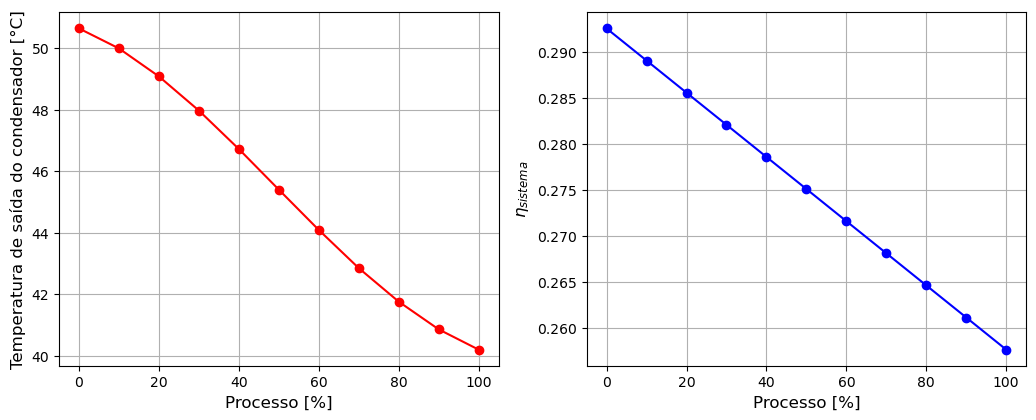

In [23]:
# Gráficos:

escala1 = 0.975
plt.figure(dpi=100, figsize=[escala1*2*6.4, escala1*4.8])
fig1 = plt.figure(dpi=100, figsize=[escala1*2*6.4, escala1*4.8])
plt.subplot(1,2,1)
plt.xlabel('Processo [%]', fontsize=12)

if Temperatura == 'k':
    plt.ylabel('Temperatura de saída do condensador [K]', fontsize=12)
    plt.plot(x, y, color='r', marker = 'o', linestyle = 'solid')
else:
    plt.ylabel('Temperatura de saída do condensador [°C]', fontsize=12)
    plt.plot(x, y, color='r', marker = 'o', linestyle = 'solid')
    
plt.grid()
plt.subplot(1,2,2)
plt.xlabel('Processo [%]', fontsize=12)
plt.ylabel('$η_{sistema}$', fontsize=12)
plt.plot(x, z, color='b', marker = 'o', linestyle = 'solid')
plt.grid()
plt.show()

## **Gráfico completo Ciclo Rankine**

<Figure size 960x720 with 0 Axes>

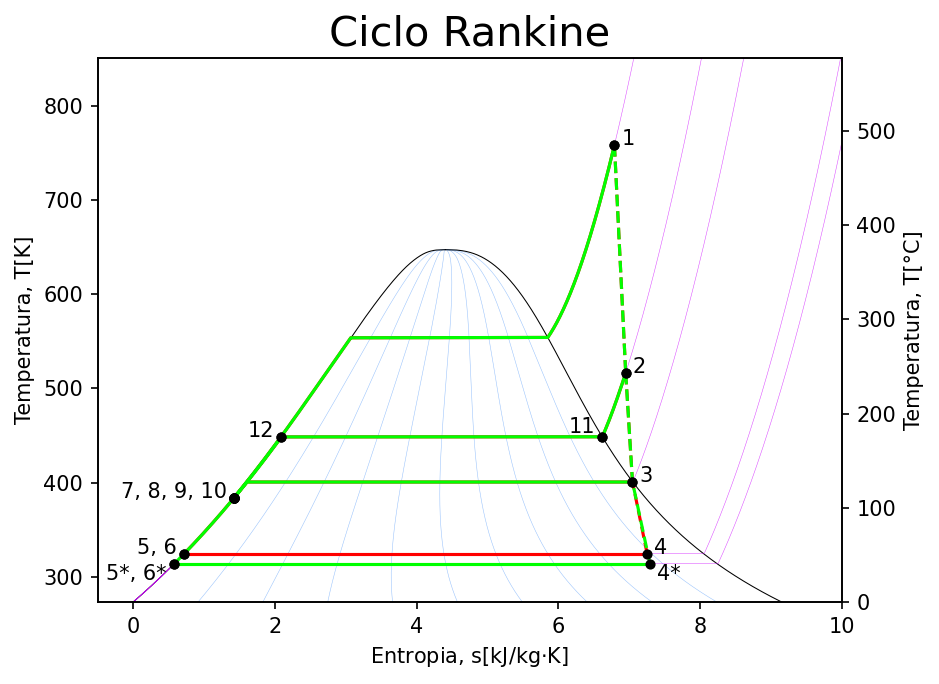

In [24]:
# Gráfico do Ciclo Rankine:
escala2 = 1
plt.figure(dpi=150, figsize=[escala2*6.4, escala2*4.8])
fig2 = plt.figure(dpi=150, figsize=[escala2*6.4, escala2*4.8])
y1 = 273.15
y2 = 850
x1 = -0.5
x2 = 10
plt.ylim(y1,y2)
plt.xlim(x1,x2)
plt.title('Ciclo Rankine',fontsize=20)
plt.xlabel('Entropia, s[kJ/kg$\cdot$K]')
plt.ylabel('Temperatura, T[K]')

Tmin = ps('Tmin',fld )
Tcrit = ps('Tcrit',fld)
Pcrit = ps('Pcrit', fld)

Larg_isolines = .25
Larg_cycle = 1.5
Larg_scatters = 15

#Linhas de entalpia:
T = np.linspace(Tmin,Tcrit,1000)
Q = np.arange(0.1,1,0.1)
for i in Q:
    s = ps('S','T',T,'Q',i,'Water')/1000
    plt.plot(s,T,'#6ca8fa',alpha=0.7,lw=Larg_isolines)

#Domo:
T = np.linspace(Tmin,Tcrit,1000)
s = ps('S','T',T,'Q',0,fld)/1000
plt.plot(s,T,'black',lw=2*Larg_isolines)

T = np.linspace(Tcrit,Tmin,1000)
s = ps('S','T',T,'Q',1,fld)/1000
plt.plot(s,T,'black',lw=2*Larg_isolines)

#Linhas de pressão constante:
T = np.linspace(Tmin,1000,1000)
P = [st_antes[0].p,st_antes[1].p,st_antes[2].p,st_antes[3].p,st_depois[3].p] #P1, P2, P3, P4 e P4*
for i in P:
    s = ps('S','T',T,'P',i*1000,'Water')/1000
    plt.plot(s,T,'#cc00ff',alpha=.7,lw=Larg_isolines)

#Ciclo:
#(antes)
T = np.linspace(st_antes[7].T,st_antes[0].T,1000)
s = ps('S','P',st_antes[0].p * 1000,'T',T,'Water')/1000
plt.plot(s,T,'r',lw=Larg_cycle)

T = np.linspace(st_antes[9].T,st_antes[1].T,1000)
s = ps('S','T',T,'P',st_antes[9].p*1000,'Water')/1000
plt.plot(s,T,'r',lw=Larg_cycle)
plt.plot([st_antes[3].s,st_antes[4].s],[st_antes[3].T,st_antes[4].T],'r',lw=Larg_cycle)

plt.plot([st_antes[0].s,st_antes[1].s],[st_antes[0].T,st_antes[1].T],color='r',linestyle='dashed',lw=Larg_cycle)
plt.plot([st_antes[1].s,st_antes[2].s],[st_antes[1].T,st_antes[2].T],color='r',linestyle='dashed',lw=Larg_cycle)

s = np.linspace(st_antes[2].s,st_antes[6].s,1000)
T = ps('T','S',s*1000,'P',st_antes[2].p*1000,'Water')
plt.plot(s,T,'r',lw=Larg_cycle)

T = np.linspace(st_antes[5].T,st_antes[6].T,1000)
s = ps('S','P',st_antes[5].p*1000,'T',T,'Water')/1000
plt.plot(s,T,'r',lw=Larg_cycle)

s = np.linspace(st_antes[2].s,st_antes[3].s,1000)
plt.plot([st_antes[3].s,st_antes[2].s],[st_antes[3].T,st_antes[2].T],color='r',linestyle='dashed',lw=Larg_cycle)

#(depois)
T = np.linspace(st_depois[7].T,st_depois[0].T,1000)
s = ps('S','P',st_depois[0].p * 1000,'T',T,'Water')/1000
plt.plot(s,T,'lime',lw=Larg_cycle)

T = np.linspace(st_depois[9].T,st_depois[1].T,1000)
s = ps('S','T',T,'P',st_depois[9].p*1000,'Water')/1000
plt.plot(s,T,'lime',lw=Larg_cycle)
plt.plot([st_depois[3].s,st_depois[4].s],[st_depois[3].T,st_depois[4].T],'lime',lw=Larg_cycle)

plt.plot([st_depois[0].s,st_depois[1].s],[st_depois[0].T,st_depois[1].T],color='lime',linestyle='dashed',lw=Larg_cycle)
plt.plot([st_depois[1].s,st_depois[2].s],[st_depois[1].T,st_depois[2].T],color='lime',linestyle='dashed',lw=Larg_cycle)

s = np.linspace(st_depois[2].s,st_depois[6].s,1000)
T = ps('T','S',s*1000,'P',st_depois[2].p*1000,'Water')
plt.plot(s,T,'lime',lw=Larg_cycle)

T = np.linspace(st_depois[5].T,st_depois[6].T,1000)
s = ps('S','P',st_depois[5].p*1000,'T',T,'Water')/1000
plt.plot(s,T,'lime',lw=Larg_cycle)

s = np.linspace(st_depois[2].s,st_depois[3].s,1000)
plt.plot([st_depois[3].s,st_depois[2].s],[st_depois[3].T,st_depois[2].T],color='lime',linestyle='dashed',lw=Larg_cycle)

#Pontuar e nomear:
for i in range(0, n):
    plt.scatter(st_antes[i].s,st_antes[i].T,zorder=5,color='k',s=Larg_scatters)
    plt.scatter(st_depois[i].s,st_depois[i].T,zorder=5,color='k',s=Larg_scatters)

plt.text(st_antes[0].s+.1,st_antes[0].T,'1',ha='left')
plt.text(st_antes[1].s+.1,st_antes[1].T,'2',ha='left')
plt.text(st_antes[2].s+.1,st_antes[2].T,'3',ha='left')
plt.text(st_antes[3].s+.1,st_antes[3].T,'4',ha='left')
plt.text(st_antes[4].s-.1,st_antes[4].T,'5, 6',ha='right')
plt.text(st_antes[6].s-.1,st_antes[6].T,'7, 8, 9, 10',ha='right')
plt.text(st_antes[10].s-.1,st_antes[10].T,'11',va='bottom',ha='right')
plt.text(st_antes[11].s-.1,st_antes[11].T+.1,'12',ha='right')
plt.text(st_depois[3].s+.1,st_depois[3].T,'4*',va='top',ha='left')
plt.text(st_depois[4].s-.1,st_depois[4].T,'5*, 6*',va='top',ha='right')

#plt.grid(lw=Larg_isolines)
plt.twinx()
plt.ylim(y1-273.15,y2-273.15)
plt.ylabel('Temperatura, T[°C]')
#plt.grid(lw=Larg_isolines)
plt.show()

# Recobrar os estados anteriores ao gráfico:

del T
del P
del s

T = [] 
P = []
s = []

for i in range(0, n):
    T.append(round(st_depois[i].T,2))
    P.append(round(st_depois[i].p,2))
    s.append(round(st_depois[i].s,2))

## **Tabela relatório completo Ciclo Rankine**

In [25]:
# Tabela 3:

table3 = np.array(STT_T + STT_P + STT_X + STT_h + STT_s + STT_v)

df3 = pd.DataFrame()
pd.set_option('display.max_rows', None)
tabela_geral = {"Propriedade": table3[:,0], "%": table3[:,1], "Estado 1": table3[:,2], "Estado 2": table3[:,3], "Estado 3": table3[:,4], "Estado 4": table3[:,5], "Estado 5": table3[:,6], "Estado 6": table3[:,7], "Estado 7": table3[:,8], "Estado 8": table3[:,9], "Estado 9": table3[:,10], "Estado 10": table3[:,11], "Estado 11": table3[:,12], "Estado 12": table3[:,13]}
df3 = pd.DataFrame(tabela_geral)

{{df3}}

## **Salvar dados e mídias**

In [26]:
# Salvar tabelas em excel:

resp = 0
while resp != 's' or resp != 'S' or resp != 'n' or resp != 'N':
    resp = input('Salvar imagens dos gráficos? (S ou N) ')
    if resp == 's' or resp == 'S' or resp == 'n' or resp == 'N':
        break
        
if resp == 's' or resp == 'S':
    print('Aguarde...\n')
    fig1.savefig('Gráficos de temperatura e eficência do conddensador.png', dpi = 500)
    fig2.savefig('Diagrama T-s.png', dpi = 500)
del resp

resp = 0
while resp != 's' or resp != 'S' or resp != 'n' or resp != 'N':
    resp = input('Salvar tabelas em Excel? (S ou N) ')
    if resp == 's' or resp == 'S' or resp == 'n' or resp == 'N':
        break

if resp == 's' or resp == 'S':
    print('Aguarde...\n')
    with pd.ExcelWriter('Tabelas.xlsx') as writer:  
        df1.to_excel(writer, sheet_name='Tabela 1')
        df2.to_excel(writer, sheet_name='Tabela 2')
        df3.to_excel(writer, sheet_name='Tabela 3', index=None)
del resp

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

print(color.GREEN + color.BOLD + '\nPrograma executado com sucesso!')

Salvar imagens dos gráficos? (S ou N) N
Salvar tabelas em Excel? (S ou N) N

Programa executado com sucesso!
